In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.float_format', lambda x: '%.4f' % x)

sns.set_theme(style='whitegrid')
grey = '#aca7a7'

In [2]:
df = pd.read_pickle('../data/watch_list_clean.pkl.xz')

In [3]:
anime = df[['title', 'num_eps', 'is_ongoing', 'duration', 'studio', 'start_year', 
            'end_year', 'season', 'avg_rating', 'num_votes', 'synopsis', 'tags', 'content_warnings', 
            'url']].drop_duplicates(['title', 'url'],
                                    ignore_index=True).sort_values('avg_rating', 
                                                                   ascending=False, 
                                                                   ignore_index=True).copy(deep=True)
anime[['start_year', 'end_year']] = anime[['start_year', 'end_year']].replace('TBA', np.NaN).astype('float')

In [4]:
df.shape

(9205634, 18)

In [5]:
anime.shape

(4473, 14)

In [6]:
df.sample(5, random_state=42)

,title,url,username,status,times_watched,user_rating,num_eps,is_ongoing,duration,studio,start_year,end_year,season,avg_rating,num_votes,synopsis,tags,content_warnings
874400,Hellsing,https://www.anime-planet.com/anime/hellsing,funnymanhu,Watched,1,4.0000,13,False,NaN,GONZO,2001.0000,2002.0000,Fall,3.9230,47128,"In present day England, a war is being fought....","[Action, Horror, Seinen, Conspiracy, England, ...","[Mature Themes, Sexual Content, Suicide, Viole..."
3315418,The Heroic Legend of Arslan: Dust Storm Dance,https://www.anime-planet.com/anime/the-heroic-...,Schorai,Watched,1,3.5000,8,False,NaN,LIDEN FILMS,2016.0000,2016.0000,Summer,3.9720,5061,The Lusitania forces continue to hold rule ove...,"[Action, Adventure, Fantasy, Shounen, Medieval...",[Violence]
5219401,K,https://www.anime-planet.com/anime/k-anime,phenyo,Watched,1,4.5000,13,False,NaN,GoHands,2012.0000,2012.0000,Fall,3.8930,27910,Japan has reclaimed its former glory under the...,"[Action, Mystery, Animeism, Gangs, Supernatura...",None
1494922,Amagami SS,https://www.anime-planet.com/anime/amagami-ss,Keii735,Watched,1,3.5000,25,False,NaN,AIC,2010.0000,2010.0000,Summer,3.7480,12295,After being stood up during a date on Christma...,"[Romance, School Life, Based on a Visual Novel]",None
2346186,Bleach,https://www.anime-planet.com/anime/bleach,lawnchaircrisis,Stalled,0,5.0000,366,False,NaN,Pierrot,2004.0000,2012.0000,Fall,4.0020,94895,Fifteen-year-old Ichigo Kurosaki is a typical ...,"[Action, Shounen, Afterlife, Shinigami, Supern...",[Violence]


In [7]:
anime.head()

,title,num_eps,is_ongoing,duration,studio,start_year,end_year,season,avg_rating,num_votes,synopsis,tags,content_warnings,url
0,Fruits Basket the Final Season,13,False,NaN,TMS Entertainment,2021.0000,2021.0000,Spring,4.6330,4764,The final arc of Fruits Basket.,"[Drama, Fantasy, Romance, Shoujo, Animal Trans...","[Emotional Abuse, Mature Themes, Suicide]",https://www.anime-planet.com/anime/fruits-bask...
1,Fullmetal Alchemist: Brotherhood,64,False,NaN,Bones,2009.0000,2010.0000,Spring,4.5800,102561,The foundation of alchemy is based on the law ...,"[Action, Adventure, Drama, Fantasy, Mystery, S...","[Animal Abuse, Mature Themes, Violence, Domest...",https://www.anime-planet.com/anime/fullmetal-a...
2,Attack on Titan 3rd Season: Part II,10,False,NaN,WIT Studio,2019.0000,2019.0000,Spring,4.5780,39571,The battle to retake Wall Maria begins now! Wi...,"[Action, Fantasy, Horror, Shounen, Dark Fantas...","[Cannibalism, Explicit Violence]",https://www.anime-planet.com/anime/attack-on-t...
3,Attack on Titan The Final Season,16,False,NaN,MAPPA,2020.0000,2021.0000,Fall,4.5780,25518,It's been four years since the Scout Regiment ...,"[Action, Drama, Fantasy, Horror, Shounen, Dark...","[Explicit Violence, Mature Themes, Physical Ab...",https://www.anime-planet.com/anime/attack-on-t...
4,Jujutsu Kaisen,24,False,NaN,MAPPA,2020.0000,2021.0000,Fall,4.5770,36351,Although Yuji Itadori looks like your average ...,"[Action, Horror, Shounen, Curse, Monsters, Sch...",[Explicit Violence],https://www.anime-planet.com/anime/jujutsu-kaisen


In [8]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205634 entries, 0 to 9205633
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   title             9205634 non-null  category
 1   url               9205634 non-null  category
 2   username          9205634 non-null  category
 3   status            9205634 non-null  category
 4   times_watched     9205634 non-null  uint16  
 5   user_rating       9205634 non-null  float32 
 6   num_eps           9205634 non-null  uint16  
 7   is_ongoing        9205634 non-null  bool    
 8   duration          334574 non-null   float32 
 9   studio            9194196 non-null  category
 10  start_year        9205634 non-null  float64 
 11  end_year          9145926 non-null  float64 
 12  season            8960955 non-null  category
 13  avg_rating        9205634 non-null  float32 
 14  num_votes         9205634 non-null  uint32  
 15  synopsis          9205634 non-nu

In [9]:
anime.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4473 entries, 0 to 4472
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   title             4473 non-null   category
 1   num_eps           4473 non-null   uint16  
 2   is_ongoing        4473 non-null   bool    
 3   duration          855 non-null    float32 
 4   studio            4159 non-null   category
 5   start_year        4473 non-null   float64 
 6   end_year          4397 non-null   float64 
 7   season            3505 non-null   category
 8   avg_rating        4473 non-null   float32 
 9   num_votes         4473 non-null   uint32  
 10  synopsis          4473 non-null   string  
 11  tags              4462 non-null   object  
 12  content_warnings  702 non-null    object  
 13  url               4473 non-null   category
dtypes: bool(1), category(4), float32(2), float64(2), object(2), string(1), uint16(1), uint32(1)
memory usage: 620.3+ KB


### `title`/`anime_url`

In [10]:
anime['title'].nunique()

4473

#### Which shows are the most popular?

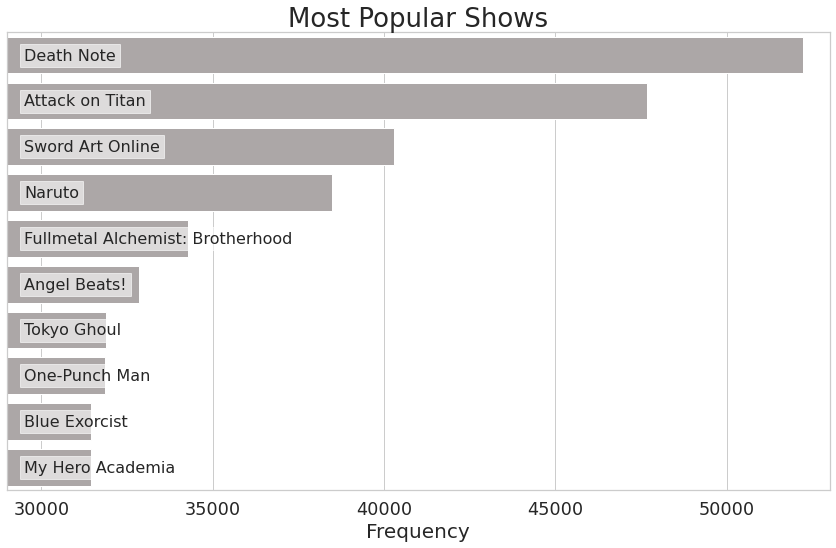

In [74]:
fig = plt.figure(figsize=(12, 8))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='title', data=df, 
              order=df['title'].value_counts().iloc[:10].index,
              color=grey, saturation=1)
plt.title('Most Popular Shows', fontdict={'fontsize':26})
plt.xlabel('Frequency', fontdict={'fontsize':20})
plt.ylabel('')
plt.yticks([])
plt.xlim(29000, 53000)
for idx, val in enumerate(df['title'].value_counts().iloc[:10].index):
    plt.text(29500, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.tight_layout()
plt.show()
fig.savefig('../assets/imgs/01_title_top10_count.png', dpi=300)

### `num_eps`

In [12]:
anime['num_eps'].describe()

count   4473.0000
mean      35.8726
std      103.0163
min        1.0000
25%       12.0000
50%       20.0000
75%       35.0000
max     2617.0000
Name: num_eps, dtype: float64

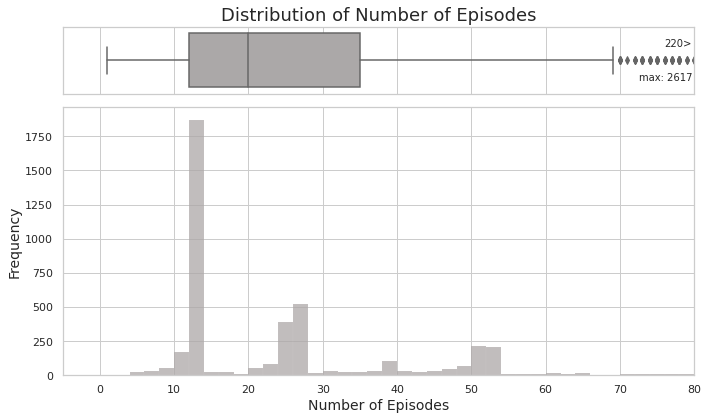

In [76]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(10, 6))
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='num_eps', data=anime, color=grey, ax=axs[0])
sns.histplot(x='num_eps', data=anime, bins=range(0, 116, 2), color=grey, ax=axs[1])

axs[0].set_title('Distribution of Number of Episodes', fontdict={'fontsize':18})
axs[0].set_xlabel('')
axs[0].text(x=76, y=-0.2, s=f"{anime.query('num_eps >= 80').shape[0]}>", fontdict={'fontsize':10})
axs[0].text(x=72.5, y=0.3, s=f"max: {anime['num_eps'].max()}", fontdict={'fontsize':10})

axs[1].set_xlabel('Number of Episodes', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
axs[1].set_xlim(-5, 80)
plt.tight_layout()
plt.show()
fig.savefig('../assets/imgs/02_num_eps_distribution.png', dpi=200)

In [15]:
anime.loc[anime['num_eps'] == anime['num_eps'].max(), ['title', 'num_eps', 'is_ongoing', 'start_year', 'end_year', 'duration']]

,title,num_eps,is_ongoing,start_year,end_year,duration
3513,Sazae-san,2617,True,1969.0000,NaN,NaN


### `is_ongoing`

In [16]:
anime['is_ongoing'].value_counts(dropna=False)

False    4397
True       76
Name: is_ongoing, dtype: int64

### `duration`

In [17]:
anime['duration'].describe()

count   855.0000
mean      7.2468
std       7.3307
min       1.0000
25%       3.0000
50%       5.0000
75%      10.0000
max      90.0000
Name: duration, dtype: float64

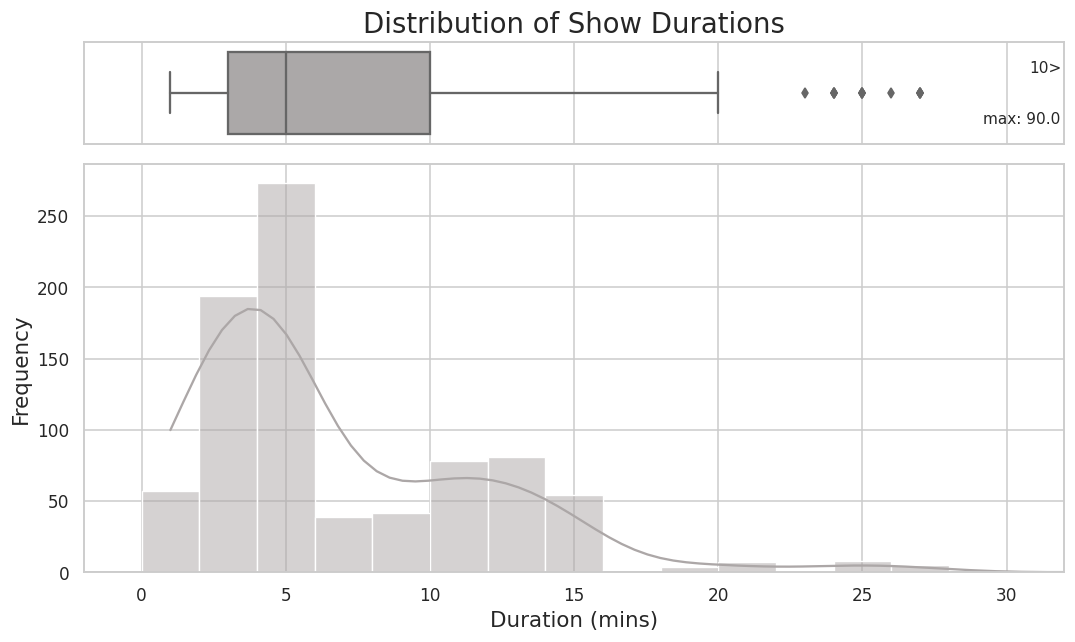

In [77]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(10, 6), dpi=110)
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='duration', data=anime, color=grey, ax=axs[0])
sns.histplot(x='duration', data=anime, kde=True, bins=range(0, 116, 2), color=grey, ax=axs[1])

axs[0].set_title('Distribution of Show Durations', fontdict={'fontsize':18})
axs[0].set_xlabel('')
axs[0].text(x=30.8, y=-0.2, s=f"{anime.query('duration >= 32').shape[0]}>", fontdict={'fontsize':10})
axs[0].text(x=29.2, y=0.3, s=f"max: {anime['duration'].max()}", fontdict={'fontsize':10})

axs[1].set_xlabel('Duration (mins)', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
axs[1].set_xlim(-2, 32)
plt.tight_layout()
plt.show()
fig.savefig('../assets/imgs/03_duration_distribution.png', dpi=200)

In [20]:
anime.loc[anime['duration'] == anime['duration'].max(), ['title', 'duration', 'num_eps', 'is_ongoing', 'start_year', 'end_year']]

,title,duration,num_eps,is_ongoing,start_year,end_year
3704,Heidi: Heidi to Clara Hen,90.0000,1,False,1996.0000,1996.0000


### `studio`

In [21]:
anime['studio'].nunique()

347

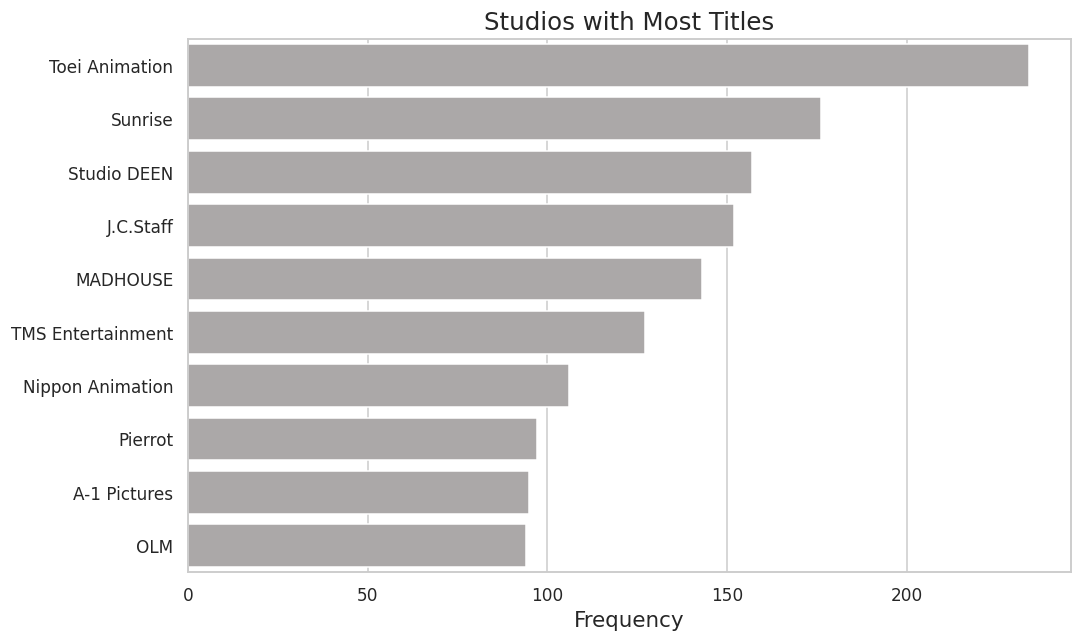

In [24]:
fig = plt.figure(figsize=(10, 6), dpi=110)
sns.set_theme(font_scale=1, style='whitegrid')
sns.countplot(y='studio', data=anime, 
              order=anime['studio'].value_counts().iloc[:10].index,
              color=grey)
plt.title('Studios with Most Titles', fontdict={'fontsize':16})
plt.xlabel('Frequency', fontdict={'fontsize':14})
plt.ylabel('')
plt.tight_layout()
plt.show()
fig.savefig('../assets/imgs/04_studio_top10_count.png', dpi=200)

### `start_year`

In [25]:
anime['start_year'].describe()

count   4473.0000
mean    2006.4067
std       12.8754
min     1961.0000
25%     2001.0000
50%     2010.0000
75%     2016.0000
max     2021.0000
Name: start_year, dtype: float64

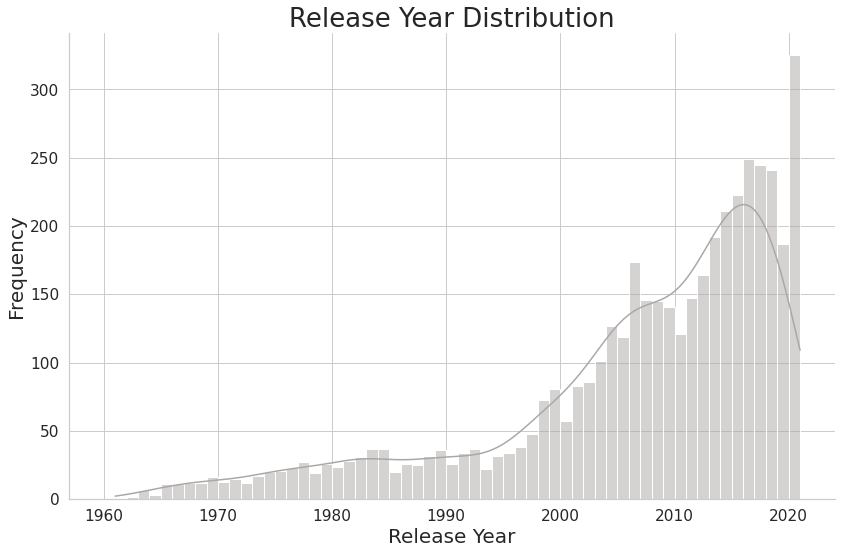

In [78]:
sns.set_theme(font_scale=1.4, style='whitegrid')
sns.displot(x='start_year', data=anime, bins=[year for year in range(1960, 2022)], kde=True, color=grey, height=8, aspect=1.5)
plt.title('Release Year Distribution', fontdict={'fontsize':26})
plt.xlabel('Release Year', fontdict={'fontsize':20})
plt.ylabel('Frequency', fontdict={'fontsize':20})
plt.tight_layout()
plt.savefig('../assets/imgs/05_start_year_distribution.png', dpi=200)
plt.show()

### `season`

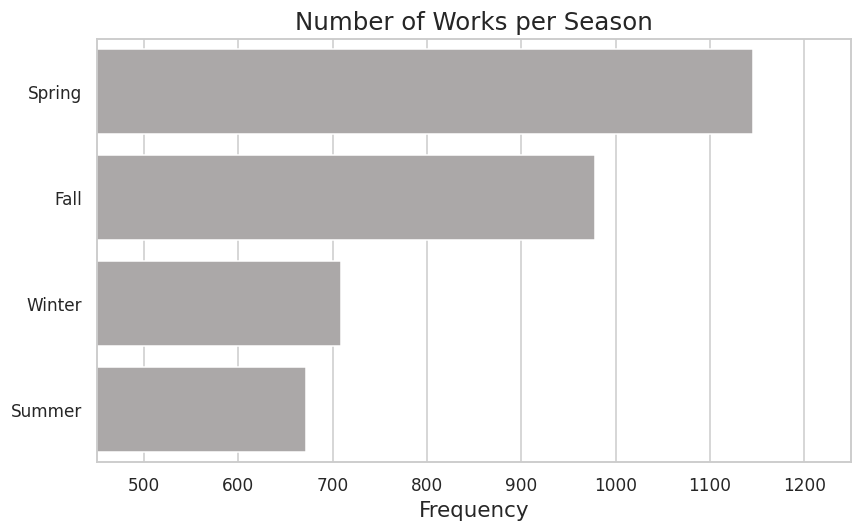

In [86]:
fig = plt.figure(figsize=(8, 5), dpi=110)
sns.set_theme(font_scale=1, style='whitegrid')
sns.countplot(y='season', data=anime, 
              order=anime['season'].value_counts().index,
              color=grey)
plt.title('Number of Works per Season', fontdict={'fontsize':16})
plt.xlabel('Frequency', fontdict={'fontsize':14})
plt.ylabel('')
plt.xlim(450, 1250)
plt.tight_layout()
plt.savefig('../assets/imgs/06_season_distribution.png', dpi=200)
plt.show()

### `avg_rating`

In [33]:
anime['avg_rating'].describe()

count   4473.0000
mean       3.4655
std        0.4036
min        1.3330
25%        3.2390
50%        3.4490
75%        3.7150
max        4.6330
Name: avg_rating, dtype: float64

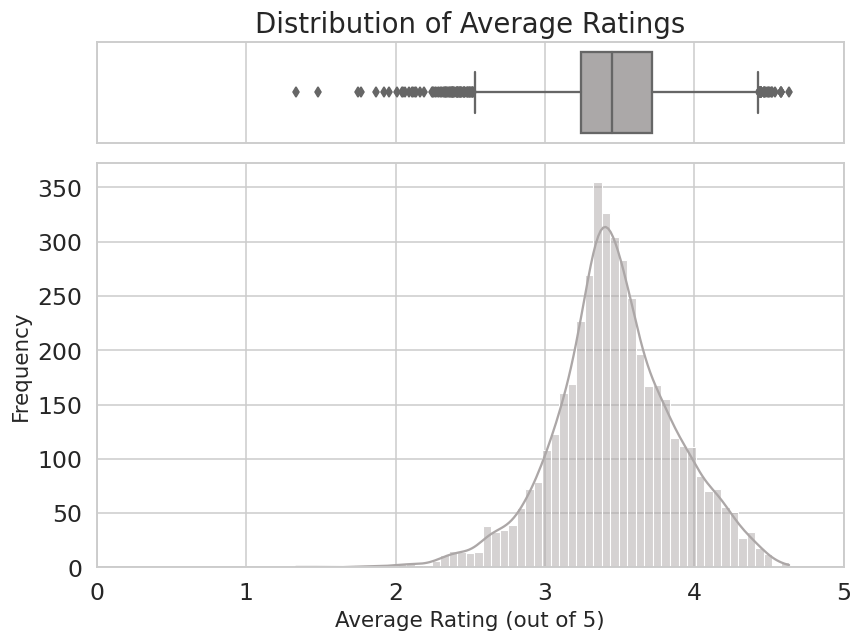

In [79]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(8, 6), dpi=110)
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='avg_rating', data=anime, color=grey, ax=axs[0])
sns.histplot(x='avg_rating', data=anime, kde=True, bins='auto', color=grey, ax=axs[1])

axs[0].set_title('Distribution of Average Ratings', fontdict={'fontsize':18})
axs[0].set_xlabel('')
# axs[0].text(x=30.8, y=-0.2, s=f"{anime.query('duration >= 32').shape[0]}>", fontdict={'fontsize':10})
# axs[0].text(x=29.2, y=0.3, s=f"max: {anime['duration'].max()}", fontdict={'fontsize':10})

axs[1].set_xlabel('Average Rating (out of 5)', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
axs[1].set_xlim(0, 5)
plt.tight_layout()
plt.show()
fig.savefig('../assets/imgs/07_avg_rating_distribution.png', dpi=200)

#### Which shows are the highest rated?

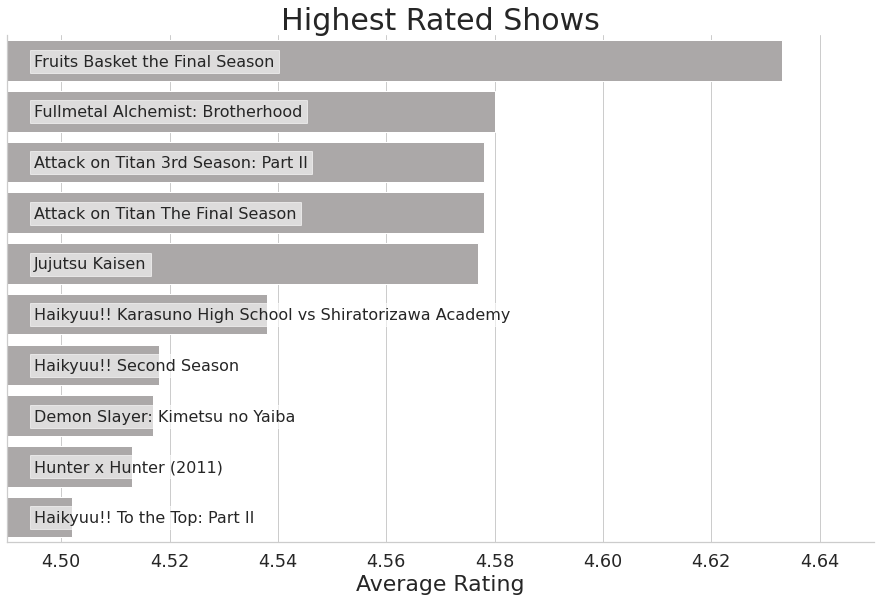

In [81]:
top10 = anime.head(10).copy(deep=True)
top10['title'] = top10['title'].astype('string')

sns.set_theme(font_scale=1.6, style='whitegrid')
sns.catplot(x='avg_rating', y='title', data=top10, kind='bar', height=8, aspect=2.5, color=grey)
plt.title('Highest Rated Shows', fontdict={'fontsize':30})
plt.xlabel('Average Rating', fontdict={'fontsize':22})
plt.ylabel('')
plt.yticks([])
plt.xlim(4.49, 4.65)
for idx, val in enumerate(top10['title']):
    plt.text(4.495, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.savefig('../assets/imgs/08_title_top10_avg_rating.png', dpi=200)
plt.show()

### `num_votes`

In [56]:
anime['num_votes'].describe()

count     4473.0000
mean      4694.4965
std      10369.1517
min         10.0000
25%         94.0000
50%        941.0000
75%       4493.0000
max     157688.0000
Name: num_votes, dtype: float64

#### Which shows have the most votes?

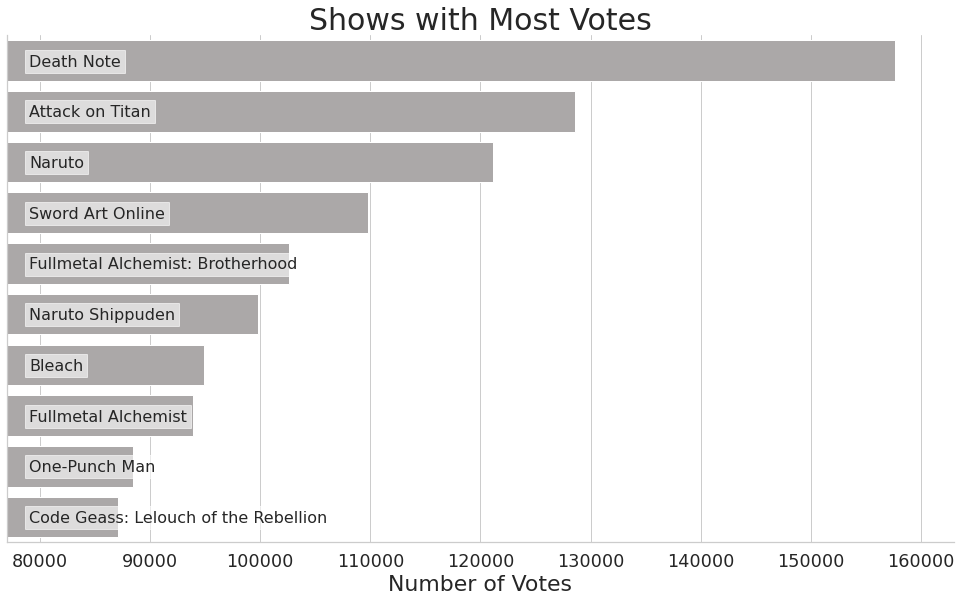

In [83]:
top10 = anime.sort_values('num_votes', ascending=False).head(10).copy(deep=True)
top10['title'] = top10['title'].astype('string')

sns.set_theme(font_scale=1.6, style='whitegrid')
sns.catplot(x='num_votes', y='title', data=top10, kind='bar', height=8, aspect=2.3, color=grey)
plt.title('Shows with Most Votes', fontdict={'fontsize':30})
plt.xlabel('Number of Votes', fontdict={'fontsize':22})
plt.ylabel('')
plt.yticks([])
plt.xlim(77000, 163000)
for idx, val in enumerate(top10['title']):
    plt.text(79000, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.savefig('../assets/imgs/09_title_top10_num_votes.png', dpi=200)
plt.show()

### `tags`

In [61]:
tags_df = anime[['title', 'tags']].set_index('title')

In [62]:
tags_df = tags_df.explode('tags').reset_index()

In [63]:
tags_df['tags'][0]

'Drama'

In [64]:
tags_df['tags'].nunique()

493

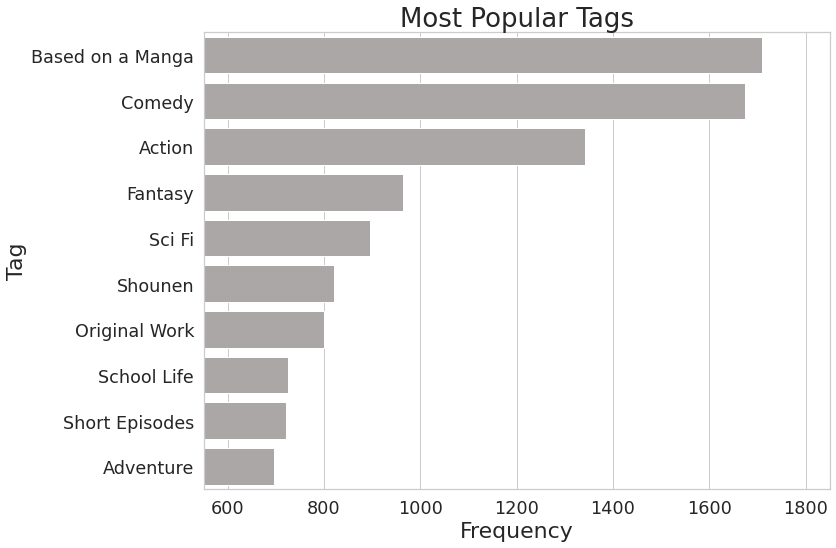

In [84]:
fig = plt.figure(figsize=(12, 8))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='tags', data=tags_df, 
              order=tags_df['tags'].value_counts().iloc[:10].index,
              color=grey, saturation=1)
plt.title('Most Popular Tags', fontdict={'fontsize':26})
plt.xlabel('Frequency', fontdict={'fontsize':22})
plt.ylabel('Tag', fontdict={'fontsize':22})
plt.xlim(550, 1850)
plt.tight_layout()
plt.savefig('../assets/imgs/10_tags_top10_count.png', dpi=200)
plt.show()

### `content_warnings`

In [69]:
cw_df = anime[['title', 'content_warnings']].set_index('title')

In [70]:
cw_df = cw_df.explode('content_warnings').reset_index()

In [71]:
cw_df

,title,content_warnings
0,Fruits Basket the Final Season,Emotional Abuse
1,Fruits Basket the Final Season,Mature Themes
2,Fruits Basket the Final Season,Suicide
3,Fullmetal Alchemist: Brotherhood,Animal Abuse
4,Fullmetal Alchemist: Brotherhood,Mature Themes
...,...,...
5147,Pupa,Physical Abuse
5148,Pupa,Domestic Abuse
5149,Mahou Shoujo? Naria Girls,None
5150,Vampire Holmes,None


In [72]:
cw_df['content_warnings'].nunique()

18

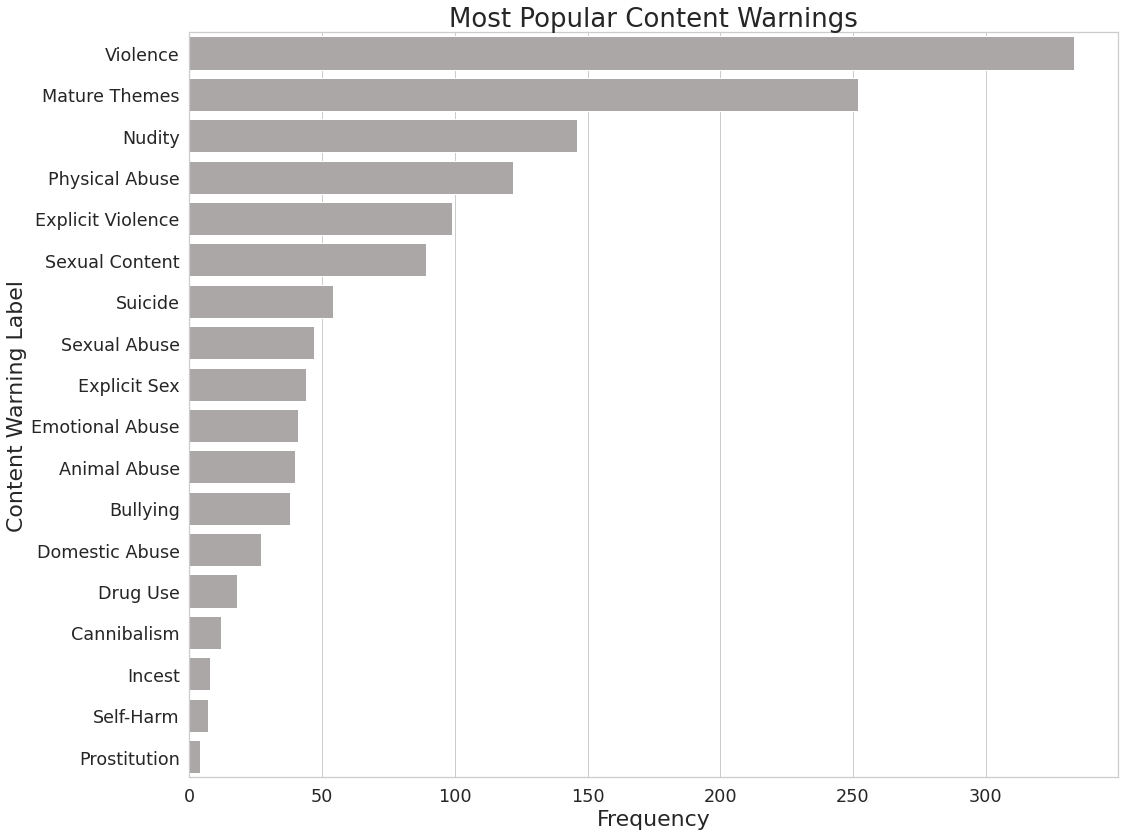

In [87]:
fig = plt.figure(figsize=(16, 12))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='content_warnings', data=cw_df, 
              order=cw_df['content_warnings'].value_counts().index,
              color=grey, saturation=1)
plt.title('Most Popular Content Warnings', fontdict={'fontsize':26})
plt.xlabel('Frequency', fontdict={'fontsize':22})
plt.ylabel('Content Warning Label', fontdict={'fontsize':22})
plt.tight_layout()
plt.savefig('../assets/imgs/11_cw_top10_count.png', dpi=200)
plt.show()

### `username`

In [88]:
df['username'].nunique()

117162

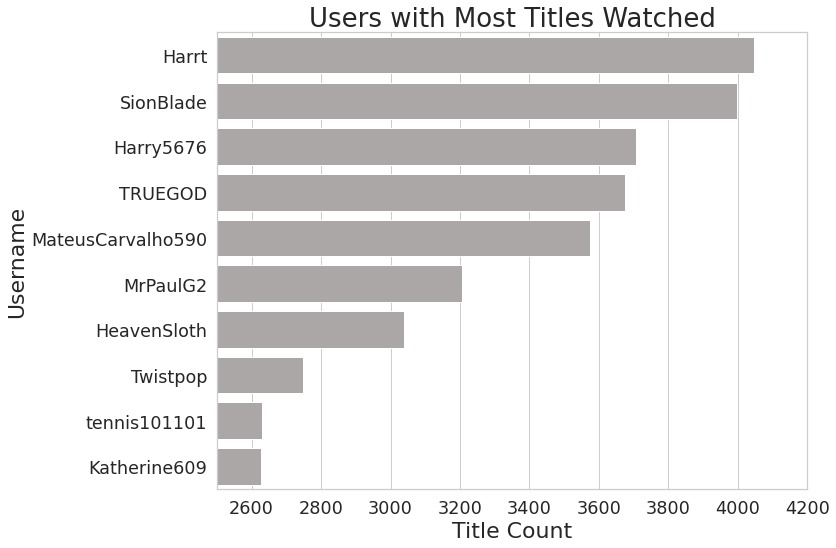

In [93]:
fig = plt.figure(figsize=(12, 8))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='username', data=df, 
              order=df['username'].value_counts().iloc[:10].index,
              color=grey, saturation=1)
plt.title('Users with Most Titles Watched', fontdict={'fontsize':26})
plt.xlabel('Title Count', fontdict={'fontsize':22})
plt.ylabel('Username', fontdict={'fontsize':22})
plt.xlim(2500, 4200)
plt.tight_layout()
plt.savefig('../assets/imgs/12_username_top10_count.png', dpi=200)
plt.show()

### `status`

In [94]:
df['status'].value_counts()

Watched     8212660
Dropped      386434
Watching     354600
Stalled      251940
Name: status, dtype: int64

### `times_watched`

In [99]:
df['times_watched'].describe()

count   9205634.0000
mean          1.2303
std           4.2770
min           0.0000
25%           1.0000
50%           1.0000
75%           1.0000
max         181.0000
Name: times_watched, dtype: float64

In [103]:
df['times_watched'].value_counts().head(10)

1     7554419
0      992974
2      384097
3      132263
4       45967
5       26783
99      14204
6       11292
10       7227
7        6137
Name: times_watched, dtype: int64

### `user_rating`

In [104]:
df['user_rating'].describe()

count   9205634.0000
mean          3.8376
std           0.9931
min           0.5000
25%           3.5000
50%           4.0000
75%           4.5000
max           5.0000
Name: user_rating, dtype: float64

In [105]:
df['user_rating'].value_counts()

5.0000    2085986
4.0000    2045439
3.5000    1455865
4.5000    1336762
3.0000    1103264
2.5000     508632
2.0000     328126
1.5000     141168
1.0000     110643
0.5000      89749
Name: user_rating, dtype: int64

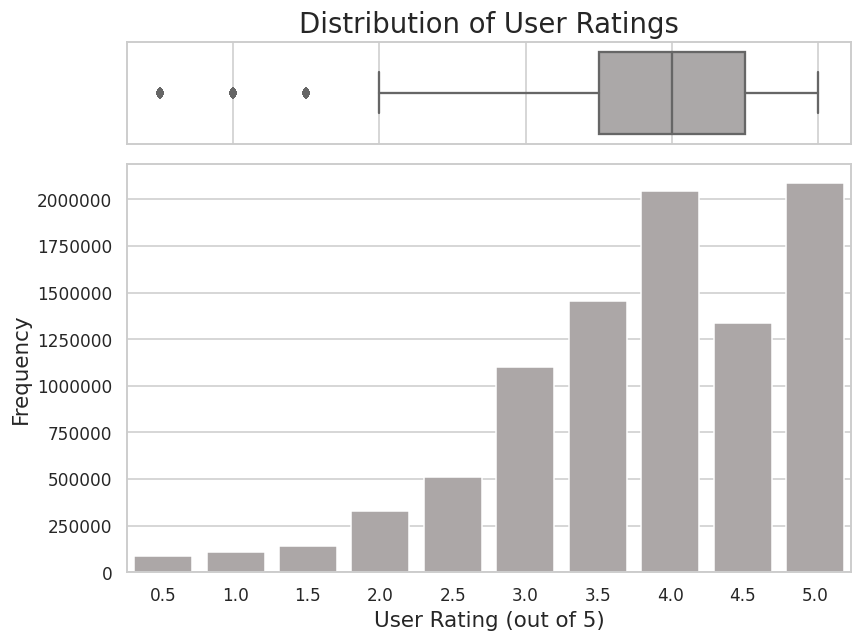

In [126]:
fig, axs = plt.subplots(2, 1, sharex=False, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(8, 6), dpi=110)
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='user_rating', data=df, color=grey, ax=axs[0])
sns.countplot(x='user_rating', data=df, 
              order=df['user_rating'].unique().sort(),
              color=grey, saturation=1)

axs[0].set_title('Distribution of User Ratings', fontdict={'fontsize':18})
axs[0].set_xlabel('')
axs[0].set_xticklabels('')
# axs[0].text(x=30.8, y=-0.2, s=f"{anime.query('duration >= 32').shape[0]}>", fontdict={'fontsize':10})
# axs[0].text(x=29.2, y=0.3, s=f"max: {anime['duration'].max()}", fontdict={'fontsize':10})

axs[1].yaxis.get_major_formatter().set_scientific(False)
axs[1].set_xlabel('User Rating (out of 5)', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
plt.tight_layout()
fig.savefig('../assets/imgs/13_user_rating_distribution.png', dpi=200)
plt.show()